# Setup

## Các hàm tiền xử lý dữ liệu

In [1]:
#Lowercase
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

from underthesea import word_tokenize

def tokenize(text):
    return word_tokenize(text, format="text")

import urllib
# Download vietnamese stop words
data=urllib.request.urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt').read()

# Read stop words
stopwords= [ x.decode('utf-8') for x in data.splitlines() ]
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

import re
def remove_html_url(text):
    return re.sub(r'http\S+', '', text)

In [2]:
import emoji

def remove_emoji(text):
    def get_emoji_regexp():
        # Sort emoji by length to make sure multi-character emojis are
    # matched first
        emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
        pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
        return re.compile(pattern)

    exp = get_emoji_regexp()
    return exp.sub(u'', text)

In [3]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text = lowercase(text)
      text = remove_punctuation(text)
      text = tokenize(text)
      text = remove_stopwords(text)
      text = remove_html_url(text)
      text = remove_emoji(text)
  
      return text

In [4]:
preprocess_text('TBN đúng là sướng quá hóa rồ. Vào nhánh nhẹ không chọn, chọn nhảy vào nhánh có Anh, Pháp, Bồ, Ba Lan, và nhiều khả năng là thêm Thụy Sĩ. Chắc xác định chỉ đá đến tứ kết nên cố né đương kim á quân Croatia. WC năm nay bịp hết rồi :v')

'tbn sướng hóa rồ nhánh nhẹ nhảy nhánh pháp bồ_ba lan khả_năng thụy_sĩ xác_định đá tứ_kết cố né đương_kim á_quân croatia wc bịp v'

# Load data

In [201]:
import pandas as pd
data = pd.read_csv('tgdd_product_description.csv')

In [202]:
data

,name,description
0,/dtdd/iphone-15-pro,Đặc điểm nổi bật của iPhone 15 Pro• Chế tác bộ...
1,/dtdd/iphone-15-pro,iPhone 15 Pro là một trong những chiếc điện th...
2,/dtdd/iphone-15-pro,• Chất lượng sản phẩm: Thế Giới Di Động cam kế...
3,/dtdd/iphone-15-pro,• Ưu đãi và khuyến mãi: Thế Giới Di Động thườn...
4,/dtdd/iphone-15-pro,• Hệ thống cửa hàng rộng rãi: Thế Giới Di Động...
...,...,...
3418,/may-tinh-bang/mobell-tab-8-1,Một điểm đáng chú ý khác của Mobell Tab 8.1 là...
3419,/may-tinh-bang/mobell-tab-8-1,"Hơn nữa, người dùng còn có thể đọc dữ liệu trự..."
3420,/may-tinh-bang/mobell-tab-8-1,"Máy tính bảng Mobell trang bị pin 4000 mAh, gi..."
3421,/may-tinh-bang/mobell-tab-8-1,Một điểm hạn chế là tốc độ sạc tối đa của thiế...


In [203]:
data['description'] = data['description'].apply(preprocess_text)

In [280]:
data

,name,description,description_length
0,/dtdd/iphone-15-pro,đặc_điểm nổi_bật iphone 15 pro •_chế_tác_bộ kh...,45
1,/dtdd/iphone-15-pro,iphone 15 pro điện_thoại thông_minh mong_đợi 2...,17
2,/dtdd/iphone-15-pro,• chất_lượng sản_phẩm thế_giới di_động cam_kết...,19
3,/dtdd/iphone-15-pro,• ưu_đãi khuyến_mãi thế_giới di_động thường_xu...,20
4,/dtdd/iphone-15-pro,• hệ_thống cửa_hàng rộng_rãi thế_giới di_động ...,18
...,...,...,...
3418,/may-tinh-bang/mobell-tab-8-1,chú_ý mobell tab 81 khả_năng kết_nối otg cho_p...,18
3419,/may-tinh-bang/mobell-tab-8-1,đọc dữ_liệu ổ cứng usb thông_qua phụ_kiện chuy...,14
3420,/may-tinh-bang/mobell-tab-8-1,máy_tính bảng mobell trang_bị pin 4000 mah giú...,15
3421,/may-tinh-bang/mobell-tab-8-1,hạn_chế tốc_độ sạc tối_đa thiết_bị 25 w sạc má...,12


In [205]:
dataDescription = list(data['description'].values)

In [206]:
dataDescription

['đặc_điểm nổi_bật iphone 15 pro •_chế_tác_bộ khung viền chất_liệu titanium cứng_cáp •_sở_hữu_cấu_hình mạnh_mẽ bậc ngành điện_thoại •_camera chụp zoom_quang 3 x • video chất_lượng 4 k khả_năng chống rung đỉnh_cao • thay_thế gạt rung action_button mới_lạ tiện_lợi • chuyển_đổi cổng sạc usbc truyền_tải dữ_liệu tốc_độ',
 'iphone 15 pro điện_thoại thông_minh mong_đợi 2023 tính_năng cải_tiến iphone 15 pro lựa_chọn tuyệt_vời tìm_kiếm điện_thoại cao_cấp',
 '• chất_lượng sản_phẩm thế_giới di_động cam_kết cung_cấp sản_phẩm iphone 15 pro hãng chất_lượng giúp yên_tâm xuất_xứ sản_phẩm tận_hưởng trải_nghiệm',
 '• ưu_đãi khuyến_mãi thế_giới di_động thường_xuyên chương_trình khuyến_mãi giảm_giá tặng quà kèm giúp tiết_kiệm khoản tiền mua iphone 15 pro',
 '• hệ_thống cửa_hàng rộng_rãi thế_giới di_động mạng_lưới cửa_hàng rộng_rãi toàn_quốc giúp dễ_dàng cửa_hàng mua_sắm kiểm_tra sản_phẩm nhân_viên cửa_hàng',
 '• dịch_vụ hậu_mãi thế_giới di_động cung_cấp dịch_vụ hậu_mãi chuyên_nghiệp bao_gồm bảo_hành sửa_c

## Lọc các từ không phải Việt và Anh

In [207]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [208]:
## kiem tra ngon ngu
vi = 0
en = 0
remove_index = []
for i in range(len(dataDescription)):
  try:
    if detect(dataDescription[i]) == 'vi':
      vi+=1
    else : 
      en+=1
      remove_index.append(i)
  except:
    remove_index.append(i)
    continue

In [209]:
## loai bo cot ngon ngu
data_old = dataDescription
dataDescription = []
for i in range(len(data_old)):
  if i in remove_index:
    continue
  else : dataDescription.append(data_old[i])

## Đánh đấu keywords bằng TextRank

In [210]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from underthesea import pos_tag


class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 
        self.min_diff = 1e-5 
        self.steps = 10 
        self.node_weight = None 

    def remove_number(self,doc):
        doc = re.sub(" \d+", " ", doc)
        return doc
    def recovery_sentence(self,doc):
        doc = doc.replace("_"," ")
        return doc
    
    def sentence_segment(self, doc, candidate_pos, lower=None):
        """Store those words only in cadidate_pos"""
        words = []
        for i,j in pos_tag(doc):
          if j in candidate_pos : 
            word_token = i.replace(' ','_')
            words.append(word_token)
        return words

    def get_vocab(self, words):
        """Get all tokens - word_dict"""
        vocab = OrderedDict()
        i = 0
        for word in words:          
          if word not in vocab:
              vocab[word] = i
              i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()

        for i, word in enumerate(sentences):
            for j in range(i+1, i+window_size):
                if j >= len(sentences):
                    break
                pair = (word, sentences[j])
                if pair not in token_pairs:
                    token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        '''xây dựng ma trận đối xứng'''
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
        g = self.symmetrize(g)
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) 
        return g_norm

    
    def get_keywords(self, number=10):
        """in top keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        re = []
        for i, (key, value) in enumerate(node_weight.items()):
            re.append(key)
            if i > number:
                break
        return re
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):

        doc = self.remove_number(text)

        doc = self.recovery_sentence(text)

        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [211]:
label_words = []
for dataDes in dataDescription:
  try:
    if len(dataDes.split()) >= 50 :
      keywords = 40
    elif 50 > len(dataDes.split()) > 25:
      keywords = 20
    else: keywords = 10
    TextRank = TextRank4Keyword()
    TextRank.analyze(dataDes, candidate_pos = ['N','A','V'])
    a = TextRank.get_keywords(keywords)
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [212]:
dataDescription[500]

'apple watch trả_lời cuộc_gọi kiểm_tra nhắn điều_khiển ứng_dụng iphone điện_thoại giúp dễ_dàng tiếp_cận thông_tin tác_vụ tiện_lợi'

In [213]:
label_words[500]

['cuộc_gọi',
 'dễ_dàng',
 'kiểm_tra',
 'giúp',
 'nhắn',
 'điện_thoại',
 'điều_khiển',
 'iphone',
 'ứng_dụng',
 'trả_lời',
 'tiếp_cận',
 'watch']

# Build model

In [214]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [215]:
#Dữ liệu huấn luyện đầu vào
x_corpus = [ i.split() for i in dataDescription]

In [281]:
x_corpus[500]

['apple',
 'watch',
 'trả_lời',
 'cuộc_gọi',
 'kiểm_tra',
 'nhắn',
 'điều_khiển',
 'ứng_dụng',
 'iphone',
 'điện_thoại',
 'giúp',
 'dễ_dàng',
 'tiếp_cận',
 'thông_tin',
 'tác_vụ',
 'tiện_lợi']

In [217]:
#Output dữ liện huấn luyện
y_label = []
for i in range(len(dataDescription)):
  label = [1 if j in label_words[i] else 0 for j in dataDescription[i].split()]
  y_label.append(label)

In [218]:
import numpy as np
np.array(y_label[500])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [282]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(x_corpus, y_label)]
print("{} câu có độ dài in-out khác nhau.".format(sum(different_length)))

0 câu có độ dài in-out khác nhau.


In [283]:
lengths = [len(seq) for seq in x_corpus]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 57


## Mã hóa từ bằng Tokenizer

In [221]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(x_corpus)

sequences = tokenizer.texts_to_sequences(x_corpus)
X_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

Y_padded=tf.keras.preprocessing.sequence.pad_sequences(y_label, maxlen=max_length, dtype='int32', padding='pre', value=2.0)

In [222]:
import pickle

#Save tokenizer để dễ load lại nhanh
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [223]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [224]:
Y = tf.keras.utils.to_categorical(Y_padded,num_classes=3)

In [284]:
X_padded[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   67,  790,  588,  238,
        509,  667,  852,   33,   23,    2,    4,   34, 1090,  215,   41,
        223])

In [225]:
Y_padded[500]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [226]:
Y[500]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

## Chia tập huấn luyện kiểm thử

In [227]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=42)

In [228]:
VALID_SIZE = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [229]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (1899, 100)
Shape of output sequences: (1899, 100, 3)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (814, 100)
Shape of output sequences: (814, 100, 3)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (479, 100)
Shape of output sequences: (479, 100, 3)


## Xây dựng model

In [230]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 150

In [231]:
rnn_model = tf.keras.Sequential()

rnn_model.add(tf.keras.Input(shape=(max_length,)))

rnn_model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False                    
))

rnn_model.add(tf.keras.layers.SimpleRNN(128, 
              return_sequences=True  
))
rnn_model.add(tf.keras.layers.SimpleRNN(64, 
              return_sequences=True  
))

rnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

In [232]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [233]:
rnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 150)       │       603,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 100, 128)       │        35,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 100, 3)         │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,709 (2.49 MB)

 Trainable params: 651,709 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [234]:
EPOCHS=15
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/15


30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - acc: 0.7987 - loss: 0.3763 - val_acc: 0.9342 - val_loss: 0.1410
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - acc: 0.9371 - loss: 0.1306 - val_acc: 0.9489 - val_loss: 0.1121
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - acc: 0.9524 - loss: 0.1044 - val_acc: 0.9554 - val_loss: 0.1006
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - acc: 0.9633 - loss: 0.0865 - val_acc: 0.9559 - val_loss: 0.0966
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - acc: 0.9702 - loss: 0.0729 - val_acc: 0.9556 - val_loss: 0.0989
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - acc: 0.9759 - loss: 0.0600 - val_acc: 0.9553 - val_loss: 0.1093
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - acc: 0.9811 - loss: 0.0495 - val_acc: 0.9525 - val_loss: 0.1186
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - acc: 0.9847 - loss: 0.0408 - val_acc: 0.9481 - val_loss: 0.1343
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - acc: 0.9861 

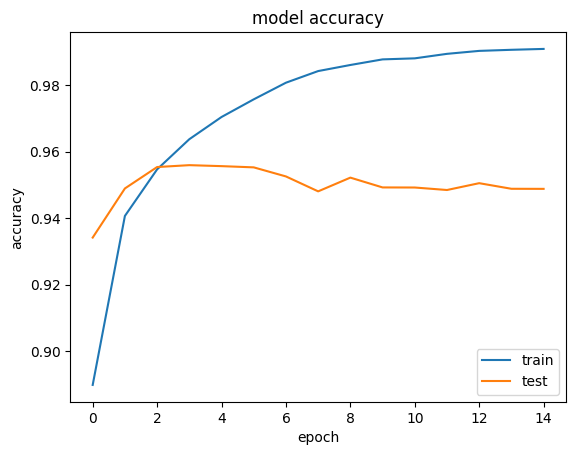

In [235]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

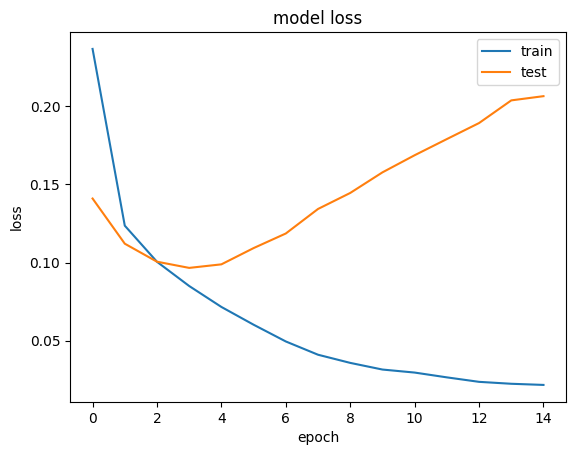

In [236]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['loss'])
plt.plot(rnn_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [237]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9515 - loss: 0.1955
Loss: 0.20334962010383606,
Accuracy: 0.9499582648277283


In [243]:
#Save model
rnn_model.save('my_model.keras')

In [244]:
from keras.models import load_model

reconstructed_model = load_model("my_model.keras")

## Demo prediction

In [269]:
text = '''Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.'''
text_pre = preprocess_text(text)
text_pre_token = [text_pre.split()]

sequences = tokenizer.texts_to_sequences(text_pre_token)
input_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

predict = rnn_model.predict(input_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [270]:
import numpy as np
label_key_phrases = np.argmax(predict[0],axis=1, out=None)

In [271]:
input_padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 293,   2, 100,  18,   8,   9, 406,  86]])

In [272]:
label_key_phrases

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [273]:
text_rever = tokenizer.sequences_to_texts(input_padded)

In [274]:
text_rever_split = text_rever[0].split()

In [275]:
key_phrases = [text_rever_split[i] for i in range(len(label_key_phrases)) if label_key_phrases[i] == 1]

In [276]:
def remove_items(test_list, item): 
    # using filter() + __ne__ to perform the task 
    res = list(filter((item).__ne__, test_list)) 
    return res 

In [277]:
key_phrases = remove_items(key_phrases, '<OOV>')

In [278]:
key_phrases_nonToken = [i.replace("_"," ") for i in key_phrases]

In [279]:
key_phrases_nonToken

['điện thoại', 'cấu hình', 'game', 'camera', 'chụp', 'hình', 'đẹp']